# Data Merging

In [2]:
#In this file we want to import the article data scraped from Berlingske and Boersen.
#We then wish to merge this with the return data for the Novo B stock

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud
from afinn import Afinn
from yahoo_fin.stock_info import get_data
from datetime import datetime

In [138]:
#First we import our article data
daily_stats_borsen = pd.read_csv('./CSV/daily_stats_borsen.csv')
daily_stats_berlingske = pd.read_csv('./CSV/daily_stats_berlingske.csv')

#We combine the two tables using concat
daily_stats = pd.concat([daily_stats_boersen, daily_stats_berlingske], ignore_index=True)

daily_stats

,Title,Date,title_nostop,title_stemmed,sentiment_score
0,"['ugen', 'der', 'gik', 'våbenbøvl', 'millionun...",2023-08-12,"['ugen', 'gik', 'våbenbøvl', 'millionunderskud...","['ugen', 'gik', 'våbenbøvl', 'millionunderskud...",0.0
1,"['chefstrateg', 'solgte', 'medicinalaktie', 'a...",2023-08-11,"['chefstrateg', 'solgte', 'medicinalaktie', 'h...","['chefstrateg', 'solg', 'medicinalakti', 'hurt...",-4.0
2,"['novoinsidere', 'sælger', 'aktier', 'for', '2...",2023-08-11,"['novoinsidere', 'sælger', 'aktier', '29', 'mi...","['novoinsid', 'sælg', 'akti', '29', 'mio', 'kr']",0.0
3,"['novos', 'udviklingschef', 'efter', 'vild', '...",2023-08-10,"['novos', 'udviklingschef', 'vild', 'uge', 'fl...","['novo', 'udviklingschef', 'vild', 'uge', 'fle...",2.0
4,"['et', 'nationalregnskab', 'uden', 'novo', 'no...",2023-08-10,"['nationalregnskab', 'uden', 'novo', 'nordisk'...","['nationalregnskab', 'uden', 'novo', 'nordisk'...",0.0
...,...,...,...,...,...
9690,"['aktier', 'novo', 'nordisk', 'vil', 'hive', '...",2015-09-28,"['aktier', 'novo', 'nordisk', 'hive', 'c20', '...","['akti', 'novo', 'nordisk', 'hiv', 'c20', 'rød...",0.0
9691,"['aktier', 'novo', 'strittede', 'imod', 'store...",2015-09-28,"['aktier', 'novo', 'strittede', 'imod', 'store...","['akti', 'novo', 'stritted', 'imod', 'stor', '...",-1.0
9692,"['novoaktien', 'står', 'til', 'kurshop', 'efte...",2015-09-28,"['novoaktien', 'står', 'kurshop', 'tresibagodk...","['novoakti', 'står', 'kurshop', 'tresibagodkend']",0.0
9693,"['novo', 'skal', 'stige', 'mindst', '5', 'pct'...",2015-09-28,"['novo', 'stige', 'mindst', '5', 'pct', 'tresi...","['novo', 'stig', 'mindst', '5', 'pct', 'tresib...",0.0


In [139]:
#Now that we have collected all the scrapped data, we can proceeed by doing descriptive statistics of the text 

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer() #Store the class in 'count' to ease coding

text_array = daily_stats['title_nostop'] #Take the first two reviews and store them in an array
bag = count.fit_transform(text_array) #fit_transform takes an array as input and outputs the bag of words

count_array = bag.toarray() #Make the bag to an array
matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix


,05,08,10,100,1000,1005,1015,104566,1068,107,...,øretæve,øretæver,ørkenvandring,ørsted,ørstedchef,ørstedregnskab,ørstedtal,øverst,øverste,øvlisen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
# Retry initializing the AFINN sentiment scoring
afn = Afinn(language='da', emoticons=True)

# Get sentiment scores for the words in the frequency matrix
word_scores = {word: afn.score(word) for word in matrix.columns}

# Filter for words with a sentiment score greater than zero
positive_sentiment_words = [word for word, score in word_scores.items() if score > 0]

# If there are positive sentiment words in our frequency matrix, proceed with computation
if any(word in matrix.columns for word in positive_sentiment_words):
    # Filter the frequency matrix for only positive sentiment words
    positive_matrix = matrix[positive_sentiment_words]

    # Sum the frequencies of these positive sentiment words across the documents
    word_sums = positive_matrix.sum()

    # Sort the words based on their summed frequencies in descending order
    sorted_positive_words = word_sums.sort_values(ascending=False)

    # Select the top 20 words
    top_20_positive_words = sorted_positive_words.head(20).index.tolist()
else:
    top_20_positive_words = []

top_20_positive_words


['vækst',
 'godt',
 'klar',
 'positivt',
 'stærkt',
 'top',
 'godkendt',
 'godkendelse',
 'toppen',
 'vinder',
 'bedste',
 'positiv',
 'fik',
 'stærk',
 'anbefaling',
 'øger',
 'værd',
 'succes',
 'bedre',
 'god']

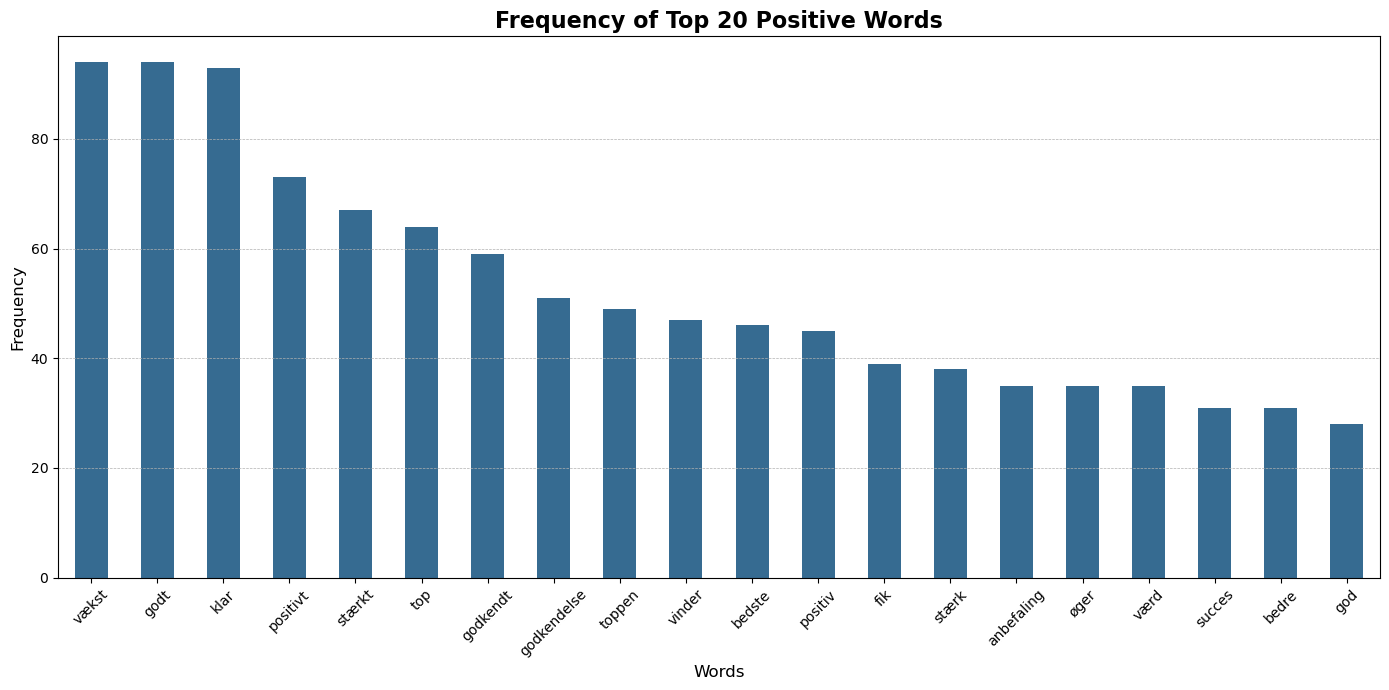

In [151]:
# Filtering the matrix for the given words
filtered_matrix = matrix[top_20_positive_words]

# Sum the frequencies for each word in the list across all documents
word_frequencies_positive = filtered_matrix.sum()

# Plotting the histogram
plt.figure(figsize=(14, 7))
word_frequencies_positive.plot(kind='bar', color=blue_palette[1])
plt.title('Frequency of Top 20 Positive Words', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Words', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Frequency', fontsize=12, fontname='DejaVu Sans')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('Top_20_Positive.png')
plt.show()


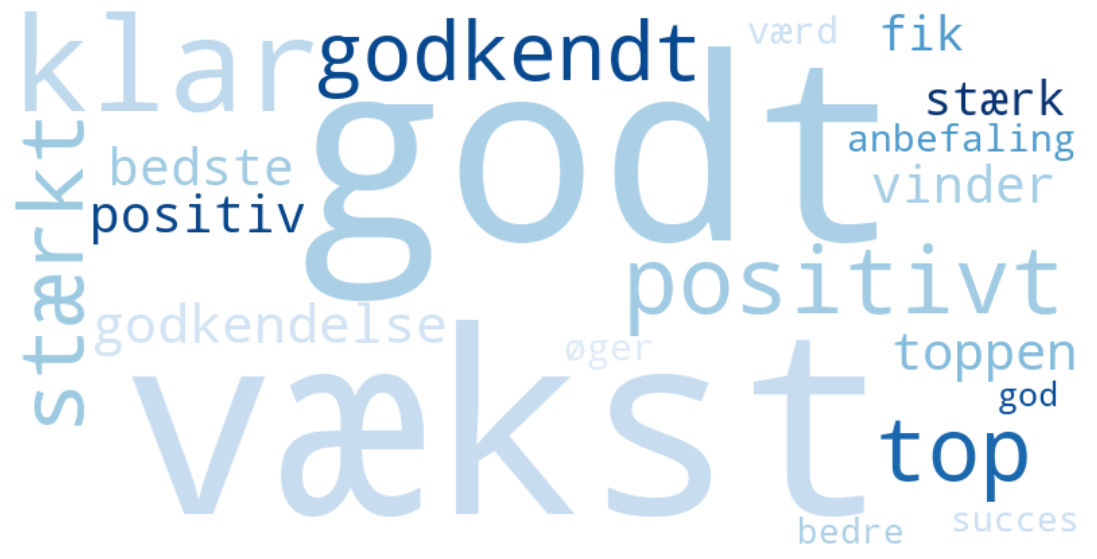

In [152]:
# 1. Create a dictionary of word frequencies
word_freq = word_frequencies_positive.to_dict()

# 2. Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Top_20_Positive_Cloud.png')
plt.show()

In [146]:
# Get sentiment scores for the words in the frequency matrix
word_scores = {word: afn.score(word) for word in matrix.columns}

# Filter for words with a sentiment score greater than zero
negative_sentiment_words = [word for word, score in word_scores.items() if score < 0]

# If there are negative sentiment words in our frequency matrix, proceed with computation
if any(word in matrix.columns for word in positive_sentiment_words):
    # Filter the frequency matrix for only negative sentiment words
    negative_matrix = matrix[negative_sentiment_words]

    # Sum the frequencies of these positive sentiment words across the documents
    word_sums = negative_matrix.sum()

    # Sort the words based on their summed frequencies in descending order
    sorted_negative_words = word_sums.sort_values(ascending=False)

    # Select the top 20 words
    top_20_negative_words = sorted_negative_words.head(20).index.tolist()
else:
    top_20_negative_words = []

top_20_negative_words

['nedtur',
 'taber',
 'kæmpe',
 'kamp',
 'venter',
 'presset',
 'skuffer',
 'ramt',
 'stopper',
 'afviser',
 'negativ',
 'kæmper',
 'negativt',
 'kritik',
 'frygter',
 'problemer',
 'stjæler',
 'skuffende',
 'svært',
 'sagsøger']

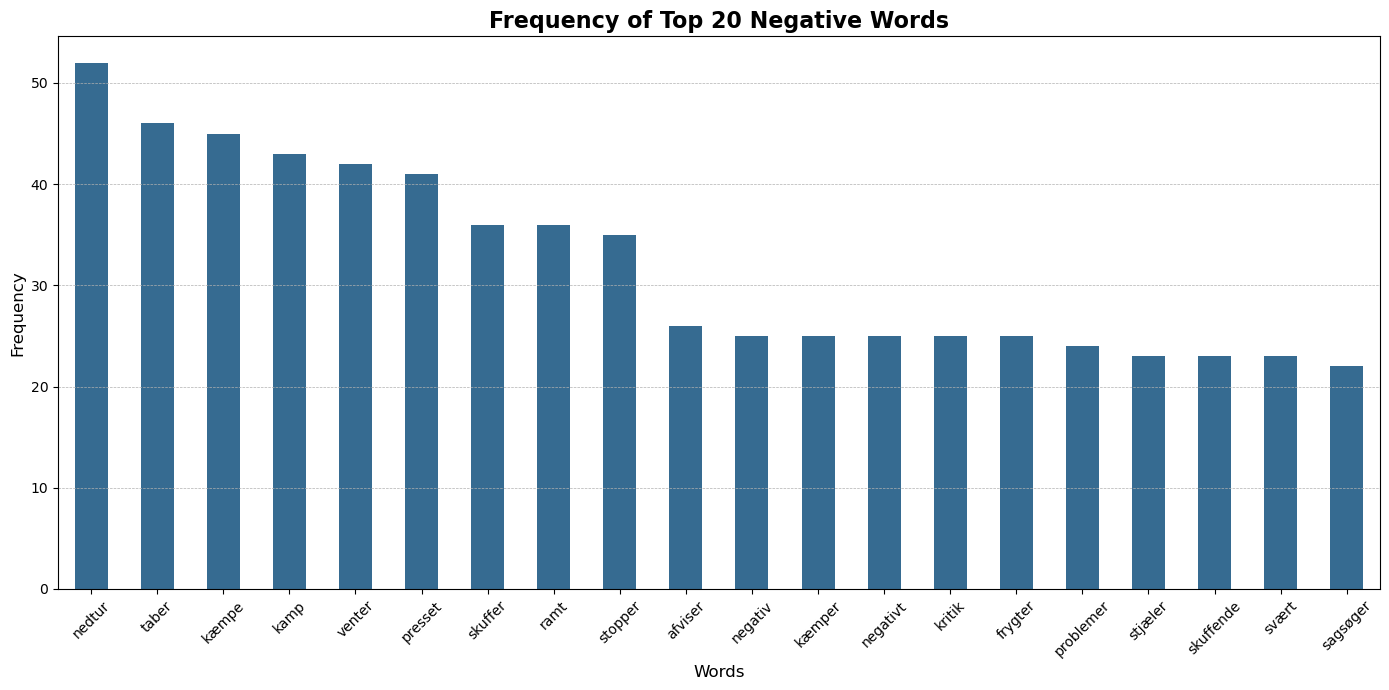

In [153]:
# Filtering the matrix for the given words
filtered_matrix = matrix[top_20_negative_words]

# Sum the frequencies for each word in the list across all documents
word_frequencies_negative = filtered_matrix.sum()

# Plotting the histogram
plt.figure(figsize=(14, 7))
word_frequencies_negative.plot(kind='bar', color=blue_palette[1])
plt.title('Frequency of Top 20 Negative Words', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Words', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Frequency', fontsize=12, fontname='DejaVu Sans')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('Top_20_Negative.png')
plt.show()

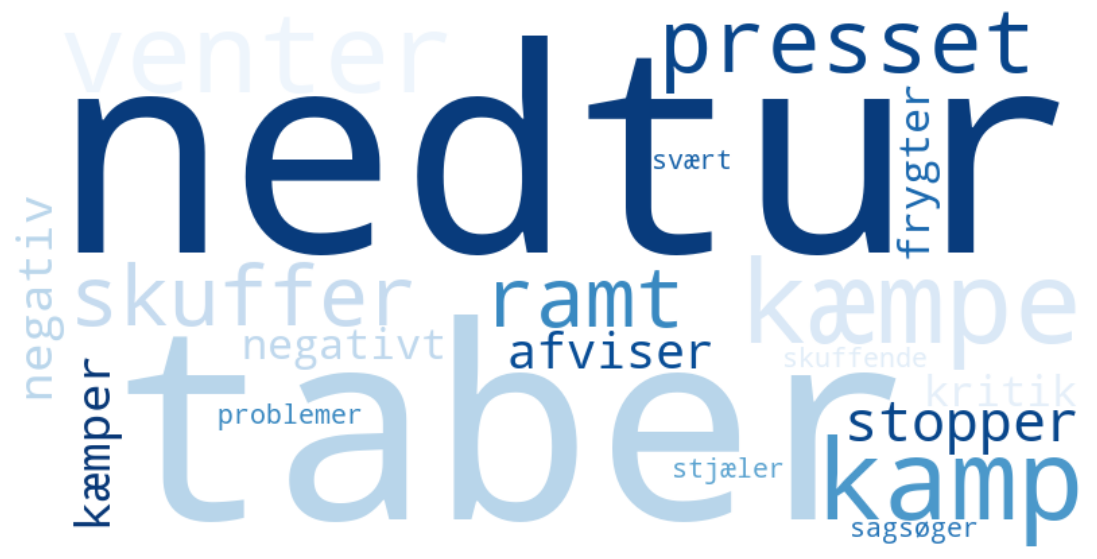

In [154]:
# 1. Create a dictionary of word frequencies
word_freq = word_frequencies_negative.to_dict()

# 2. Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Top_20_Negative_Cloud.png')
plt.show()

In [77]:
#Now we ues the group by to get a mean, standard deviation for sentiments for each day and determine the volume of articles on a given day.
# Group by the 'Date' column and compute the mean and standard deviation for 'sentiment_score'
article_data = daily_stats.groupby('Date')['sentiment_score'].agg(['mean', 'std', 'count'])
article_data.rename(columns={'count': 'volume'}, inplace=True)

#We ensure that the index is in a date format
article_data.index = pd.to_datetime(article_data.index)

#Print the table
article_data

,mean,std,volume
Date,,,
1996-07-18,0.000000,0.000000,2
1996-08-14,1.000000,NaN,1
1996-08-15,-0.333333,0.577350,3
1996-09-03,0.000000,NaN,1
1996-09-04,-3.000000,NaN,1
...,...,...,...
2023-08-08,0.250000,2.179449,12
2023-08-09,1.444444,2.962731,9
2023-08-10,-0.400000,1.776388,10


In [78]:
#Now we want to pull the stock price data for the NOVO B stock. 
#To do this we use the yahoo API

#We determine the 
start_date = article_data.index.min()
end_date = article_data.index.max()

#We can now use the yahoo API to get data for the Novo stock in the respective time period
novo = get_data('NOVO-B.CO', start_date=start_date, end_date=end_date, index_as_date = True, interval = '1d')
novo['daily_return']=novo['adjclose'].pct_change()
novo

,open,high,low,close,adjclose,volume,ticker,daily_return
2001-01-08,38.500000,38.799999,37.750000,37.799999,23.940189,3872000.0,NOVO-B.CO,NaN
2001-01-09,37.799999,37.799999,37.799999,37.799999,23.940189,0.0,NOVO-B.CO,0.000000
2001-01-10,34.500000,34.500000,32.799999,33.700001,21.343508,4849000.0,NOVO-B.CO,-0.108465
2001-01-11,33.549999,33.799999,33.299999,33.700001,21.343508,2291000.0,NOVO-B.CO,0.000000
2001-01-12,33.700001,33.700001,33.700001,33.700001,21.343508,0.0,NOVO-B.CO,0.000000
...,...,...,...,...,...,...,...,...
2023-08-07,1071.599976,1091.400024,1069.199951,1091.400024,1091.400024,1031197.0,NOVO-B.CO,0.028071
2023-08-08,1095.000000,1293.599976,1082.000000,1279.800049,1279.800049,6612886.0,NOVO-B.CO,0.172622
2023-08-09,1266.199951,1291.599976,1244.599976,1263.400024,1263.400024,2738692.0,NOVO-B.CO,-0.012815
2023-08-10,1259.400024,1261.000000,1224.000000,1248.000000,1248.000000,2719484.0,NOVO-B.CO,-0.012189


In [80]:
#We decide to include data from 2005 and forward
novo = novo[novo.index >= '2005-01-01']
article_data = article_data[article_data.index >= '2005-01-01']

In [158]:
#We want to merge the two data frames such that we obtain a data frame with the date, mean, std, volume and daily return
df_merged = pd.merge(article_data[['mean', 'std', 'volume']], 
                     novo[['daily_return']], 
                     left_index=True, 
                     right_index=True, 
                     how='left')
df_merged.columns = ['mean_sentiment', 'std_sentiment', 'daily_volume', 'daily_return']
df_merged


,mean_sentiment,std_sentiment,daily_volume,daily_return
Date,,,,
2005-01-03,-0.500000,0.707107,2,-0.018395
2005-01-04,0.000000,NaN,1,-0.022147
2005-01-06,0.000000,0.000000,3,0.027972
2005-01-07,0.000000,0.000000,4,0.015306
2005-01-11,-0.333333,0.577350,3,-0.018487
...,...,...,...,...
2023-08-08,0.250000,2.179449,12,0.172622
2023-08-09,1.444444,2.962731,9,-0.012815
2023-08-10,-0.400000,1.776388,10,-0.012189


In [160]:
#Finally, we drop all rows where there is only one article observation, as this datapoint will not have a standard deviation
df_merged_clean = df_merged.dropna()

#We add an index
df_merged_clean = df_merged_clean.reset_index().rename(columns={'index': 'date'})

#Print the final table
df_merged_clean

,Date,mean_sentiment,std_sentiment,daily_volume,daily_return
0,2005-01-03,-0.500000,0.707107,2,-0.018395
1,2005-01-06,0.000000,0.000000,3,0.027972
2,2005-01-07,0.000000,0.000000,4,0.015306
3,2005-01-11,-0.333333,0.577350,3,-0.018487
4,2005-01-18,-1.000000,1.414214,2,-0.011986
...,...,...,...,...,...
1701,2023-08-07,0.000000,0.000000,3,0.028071
1702,2023-08-08,0.250000,2.179449,12,0.172622
1703,2023-08-09,1.444444,2.962731,9,-0.012815
1704,2023-08-10,-0.400000,1.776388,10,-0.012189


In [161]:
#Now we want to convert the dataframe df_merged_clean to a csv file so that this can be imported in the machine learning module
df_merged_clean.to_csv('./CSV/df_merged_clean.csv', index=False)

In [163]:
#Descriptive statistics
df_final=df_merged_clean
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final['log_vol'] = np.log(df_final['daily_volume'])
df_final

print(df_final[['mean_sentiment', 'std_sentiment', 'daily_volume']].describe(percentiles=[]).loc[['mean', 'std', 'min','50%', 'max']].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  mean\_sentiment &  std\_sentiment &  daily\_volume \\
\midrule
mean &        0.126970 &       0.942078 &      4.163540 \\
std  &        0.915885 &       0.868317 &      3.523809 \\
min  &       -5.000000 &       0.000000 &      2.000000 \\
50\%  &        0.000000 &       0.957427 &      3.000000 \\
max  &        4.000000 &       5.656854 &     38.000000 \\
\bottomrule
\end{tabular}



/var/folders/nh/25gr2gcn4rd1mz34g3j0_b8m0000gn/T/ipykernel_51024/4287079914.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_final[['mean_sentiment', 'std_sentiment', 'daily_volume']].describe(percentiles=[]).loc[['mean', 'std', 'min','50%', 'max']].to_latex())


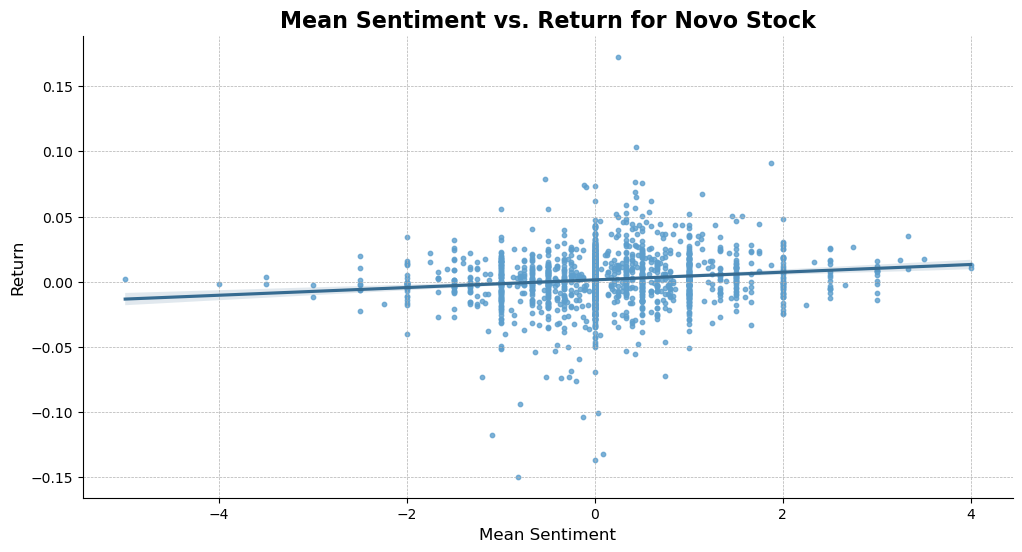

In [164]:
# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='mean_sentiment', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Mean Sentiment vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('Mean Sentiment', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.savefig('Mean_sentiment_return.png')
plt.show()

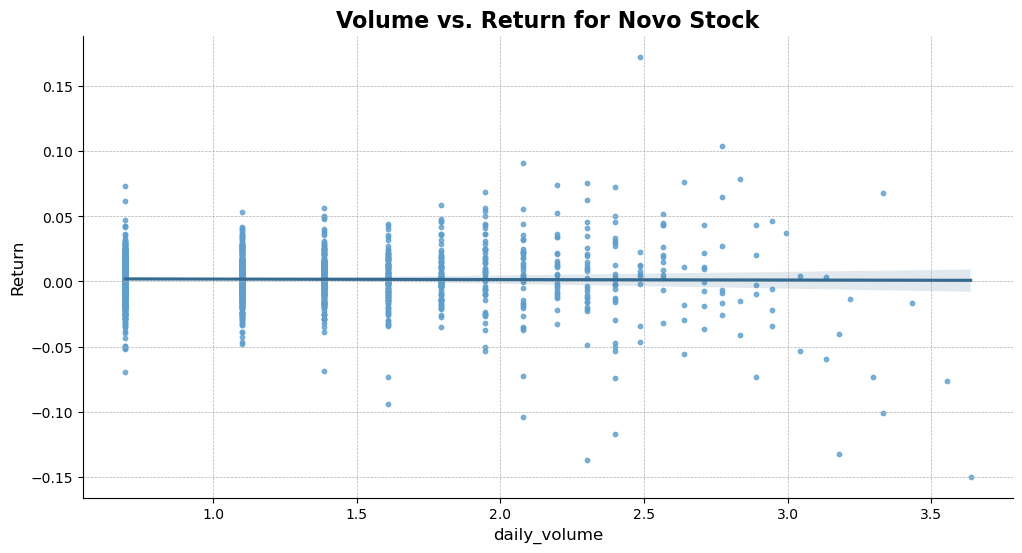

In [165]:
# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='log_vol', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Volume vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('daily_volume', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.savefig('Volume_return.png')
plt.show()

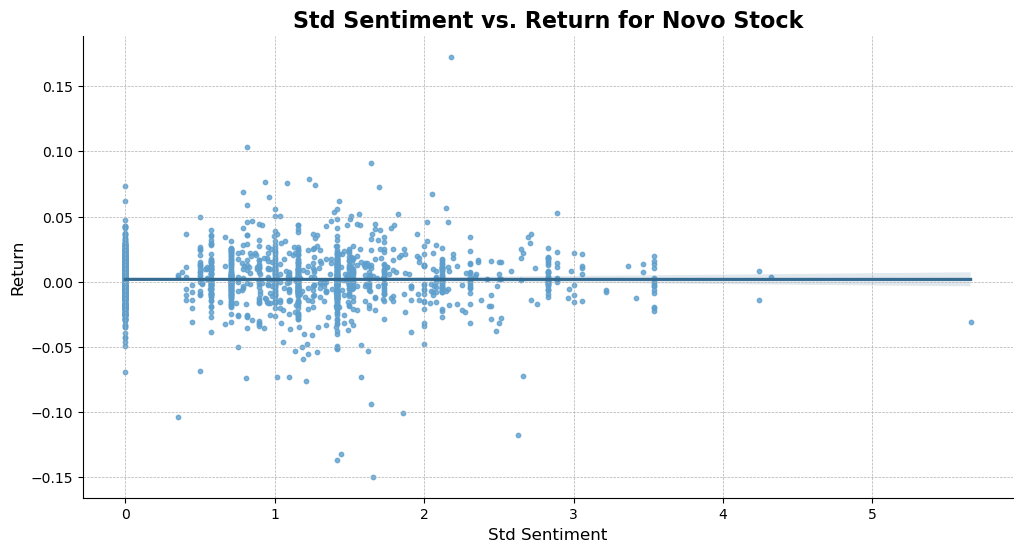

In [166]:
# Set a blue palette for the graph
blue_palette = sns.color_palette("Blues_d", 2)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.regplot(x='std_sentiment', y='daily_return', data=df_final, ci=95, scatter_kws={'s':10, 'color': blue_palette[0]}, line_kws={'color': blue_palette[1]})
plt.title('Std Sentiment vs. Return for Novo Stock', fontsize=16, fontweight='bold')
plt.xlabel('Std Sentiment', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Return', fontsize=12, fontname='DejaVu Sans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()

plt.savefig('STD_sentiment_return.png')
plt.show()

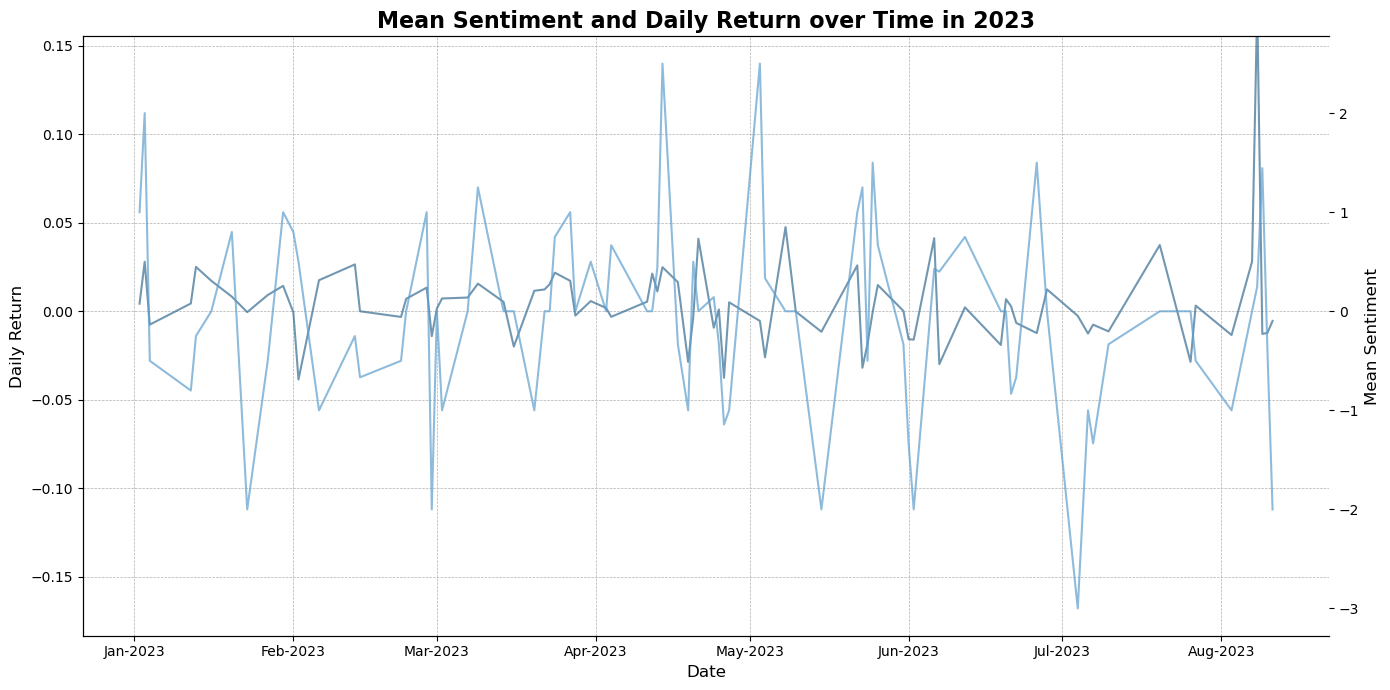

In [175]:
import matplotlib.dates as mdates

def align_yaxis_zero(ax1, ax2):
    """Align the zero values of two y-axes."""
    
    # Extract the limits for both y-axes
    ylim1 = ax1.get_ylim()
    ylim2 = ax2.get_ylim()
    
    # Determine the fraction of the zero position for each y-axis relative to its limits
    fraction1 = (0 - ylim1[0]) / (ylim1[1] - ylim1[0])
    fraction2 = (0 - ylim2[0]) / (ylim2[1] - ylim2[0])
    
    # Adjust y-limits to align zeros based on the computed fractions
    if fraction1 > fraction2:
        span = (ylim2[1] - 0) / fraction1
        ax2.set_ylim(0 - fraction1 * span, 0 + (1 - fraction1) * span)
    else:
        span = (ylim1[1] - 0) / fraction2
        ax1.set_ylim(0 - fraction2 * span, 0 + (1 - fraction2) * span)

# Set up the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Daily Return on primary y-axis
ax1.plot(df_2023['Date'], df_2023['daily_return'], label='Daily Return', color=blue_palette[1], alpha=0.7)
ax1.set_xlabel('Date', fontsize=12, fontname='DejaVu Sans')
ax1.set_ylabel('Daily Return', fontsize=12, fontname='DejaVu Sans')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set up secondary y-axis for Mean Sentiment and use a darker blue
ax2 = ax1.twinx()
ax2.plot(df_2023['Date'], df_2023['mean_sentiment'], label='Mean Sentiment', color=blue_palette[0], alpha=0.7)
ax2.set_ylabel('Mean Sentiment', fontsize=12, fontname='DejaVu Sans')

# Align zeros of the two y-axes
align_yaxis_zero(ax1, ax2)

# Title and legend
plt.title('Mean Sentiment and Daily Return over Time in 2023', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
fig.tight_layout()

# Remove right spine
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.savefig('Mean_sentiment_retunr_over_time.png')
plt.show()